# Load and examine data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
# traffic_data= pd.read_csv("/content/drive/MyDrive/collab datasets/Metro_Interstate_Traffic_Volume.csv")
traffic_data= pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")
# Display the first few rows of the dataset and the summary statistics
traffic_data.head(), traffic_data.describe(), traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


(  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
 0     NaN  288.28      0.0      0.0          40       Clouds   
 1     NaN  289.36      0.0      0.0          75       Clouds   
 2     NaN  289.58      0.0      0.0          90       Clouds   
 3     NaN  290.13      0.0      0.0          90       Clouds   
 4     NaN  291.14      0.0      0.0          75       Clouds   
 
   weather_description            date_time  traffic_volume  
 0    scattered clouds  2012-10-02 09:00:00            5545  
 1       broken clouds  2012-10-02 10:00:00            4516  
 2     overcast clouds  2012-10-02 11:00:00            4767  
 3     overcast clouds  2012-10-02 12:00:00            5026  
 4       broken clouds  2012-10-02 13:00:00            4918  ,
                temp       rain_1h       snow_1h    clouds_all  traffic_volume
 count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
 mean     281.205870      0.334264      0.000222     49.362231     3259.81835

In [ ]:
traffic_data.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [ ]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Data cleaning

In [ ]:
# Convert 'date_time' to datetime format
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])

# Investigate zero or unrealistic temperature values
zero_temp = traffic_data[traffic_data['temp'] == 0]

# Investigate potential outliers in rain data
rain_outliers = traffic_data[traffic_data['rain_1h'] > 50]  # Arbitrarily checking for rain > 50 mm/h as potential outliers

zero_temp, rain_outliers

(      holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
 11898     NaN   0.0      0.0      0.0           0        Clear   
 11899     NaN   0.0      0.0      0.0           0        Clear   
 11900     NaN   0.0      0.0      0.0           0        Clear   
 11901     NaN   0.0      0.0      0.0           0        Clear   
 11946     NaN   0.0      0.0      0.0           0        Clear   
 11947     NaN   0.0      0.0      0.0           0        Clear   
 11948     NaN   0.0      0.0      0.0           0        Clear   
 11949     NaN   0.0      0.0      0.0           0        Clear   
 11950     NaN   0.0      0.0      0.0           0        Clear   
 11951     NaN   0.0      0.0      0.0           0        Clear   
 
       weather_description           date_time  traffic_volume  
 11898        sky is clear 2014-01-31 03:00:00             361  
 11899        sky is clear 2014-01-31 04:00:00             734  
 11900        sky is clear 2014-01-31 05:00:00            2557  
 

In [ ]:
# Check for hidden missing values or improperly coded values
hidden_missing = traffic_data.isin([999, 9999, -999, -9999]).sum()

# Check data types and convert if necessary
data_types = traffic_data.dtypes

# Check for duplicates
duplicates = traffic_data.duplicated().sum()

# Check for anomalies in other variables such as clouds_all, traffic_volume
anomalies_clouds = traffic_data['clouds_all'].value_counts()
anomalies_traffic = traffic_data['traffic_volume'].value_counts()

hidden_missing, data_types, duplicates, anomalies_clouds, anomalies_traffic

(holiday                0
 temp                   0
 rain_1h                0
 snow_1h                0
 clouds_all             0
 weather_main           0
 weather_description    0
 date_time              0
 traffic_volume         9
 dtype: int64,
 holiday                        object
 temp                          float64
 rain_1h                       float64
 snow_1h                       float64
 clouds_all                      int64
 weather_main                   object
 weather_description            object
 date_time              datetime64[ns]
 traffic_volume                  int64
 dtype: object,
 17,
 clouds_all
 90     16442
 1      12761
 75      5069
 40      3993
 0       1988
 20      1849
 64      1558
 5       1094
 92       776
 12       273
 8        270
 24       186
 32       185
 88       183
 80       181
 48       180
 68       179
 36       169
 56       166
 76       153
 44       147
 100       94
 99        44
 93        34
 98        21
 87        18
 85

In [ ]:
# Remove duplicates
traffic_data_cleaned = traffic_data.drop_duplicates()

# Check for unusually frequent traffic volume values (already noted from the value counts)
frequent_traffic_volumes = traffic_data_cleaned['traffic_volume'].value_counts().head(10)

# Review rows with frequent traffic volume values to ensure they are valid
review_frequent_traffic = traffic_data_cleaned[traffic_data_cleaned['traffic_volume'].isin(frequent_traffic_volumes.index)]

# Number of entries after removing duplicates
entries_after_cleanup = traffic_data_cleaned.shape[0]

frequent_traffic_volumes, review_frequent_traffic.head(), entries_after_cleanup

(traffic_volume
 353    50
 356    50
 340    47
 351    44
 373    42
 333    42
 369    42
 339    41
 337    40
 357    40
 Name: count, dtype: int64,
     holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
 36      NaN  283.47      0.0      0.0           1        Clear   
 350     NaN  286.93      0.0      0.0          75       Clouds   
 400     NaN  280.44      0.0      0.0          87      Drizzle   
 401     NaN  280.44      0.0      0.0          87         Mist   
 927     NaN  274.41      0.0      0.0          98        Clear   
 
          weather_description           date_time  traffic_volume  
 36              sky is clear 2012-10-04 01:00:00             369  
 350            broken clouds 2012-10-17 01:00:00             333  
 400  light intensity drizzle 2012-10-19 02:00:00             353  
 401                     mist 2012-10-19 02:00:00             353  
 927             sky is clear 2012-11-06 03:00:00             356  ,
 48187)

# Exploratory Data Analysis

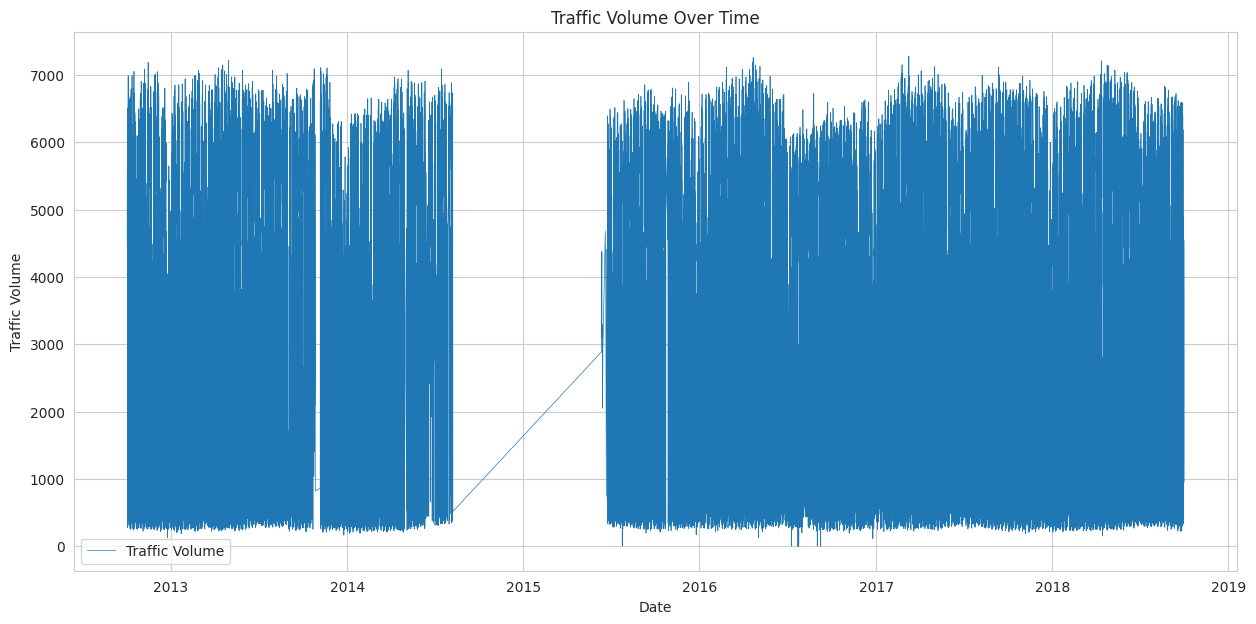

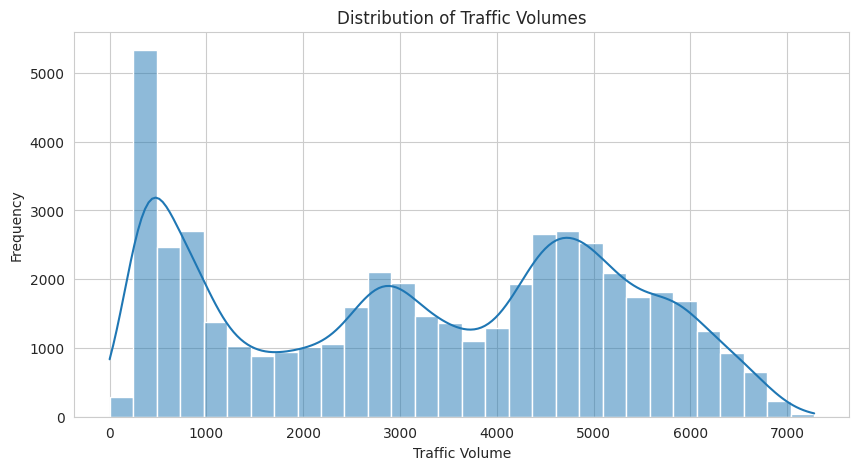

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a time series plot of traffic volume over time
plt.figure(figsize=(15, 7))
plt.plot(traffic_data_cleaned['date_time'], traffic_data_cleaned['traffic_volume'], label='Traffic Volume', linewidth=0.5)
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

# Visualize traffic volume distribution to see overall spread and spikes
plt.figure(figsize=(10, 5))
sns.histplot(traffic_data_cleaned['traffic_volume'], bins=30, kde=True)
plt.title('Distribution of Traffic Volumes')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

<ipython-input-8-ea8d2502e67d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data_cleaned['hour'] = traffic_data_cleaned['date_time'].dt.hour
<ipython-input-8-ea8d2502e67d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data_cleaned['day_of_week'] = traffic_data_cleaned['date_time'].dt.dayofweek
<ipython-input-8-ea8d2502e67d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

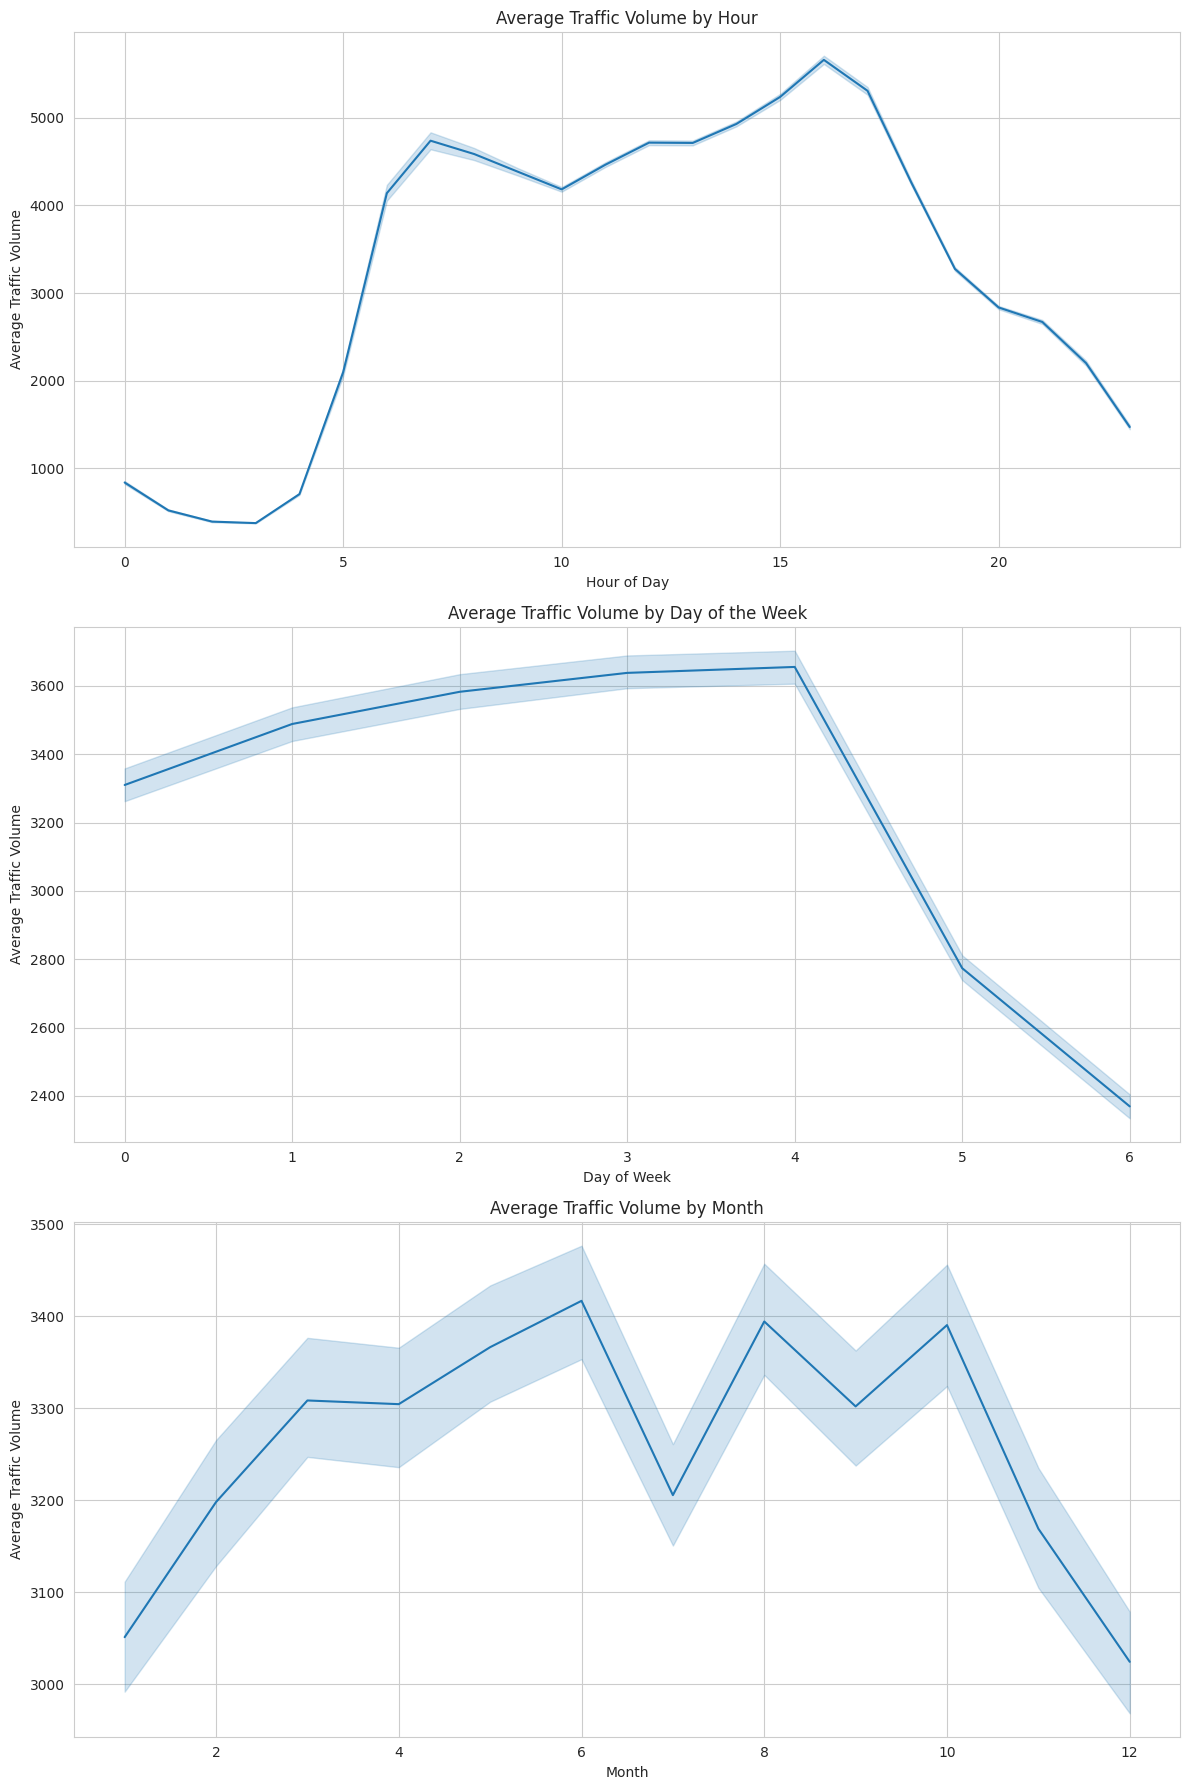

In [ ]:
# Extract hour, day of the week, and month from the date_time column
traffic_data_cleaned['hour'] = traffic_data_cleaned['date_time'].dt.hour
traffic_data_cleaned['day_of_week'] = traffic_data_cleaned['date_time'].dt.dayofweek
traffic_data_cleaned['month'] = traffic_data_cleaned['date_time'].dt.month

# Visualizing traffic patterns by hour, day of the week, and month
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Hourly Traffic Pattern
sns.lineplot(ax=axes[0], x='hour', y='traffic_volume', data=traffic_data_cleaned, estimator='mean')
axes[0].set_title('Average Traffic Volume by Hour')
axes[0].set_ylabel('Average Traffic Volume')
axes[0].set_xlabel('Hour of Day')

# Daily Traffic Pattern (Day of the Week)
sns.lineplot(ax=axes[1], x='day_of_week', y='traffic_volume', data=traffic_data_cleaned, estimator='mean')
axes[1].set_title('Average Traffic Volume by Day of the Week')
axes[1].set_ylabel('Average Traffic Volume')
axes[1].set_xlabel('Day of Week')

# Monthly Traffic Pattern
sns.lineplot(ax=axes[2], x='month', y='traffic_volume', data=traffic_data_cleaned, estimator='mean')
axes[2].set_title('Average Traffic Volume by Month')
axes[2].set_ylabel('Average Traffic Volume')
axes[2].set_xlabel('Month')

plt.tight_layout()
plt.show()

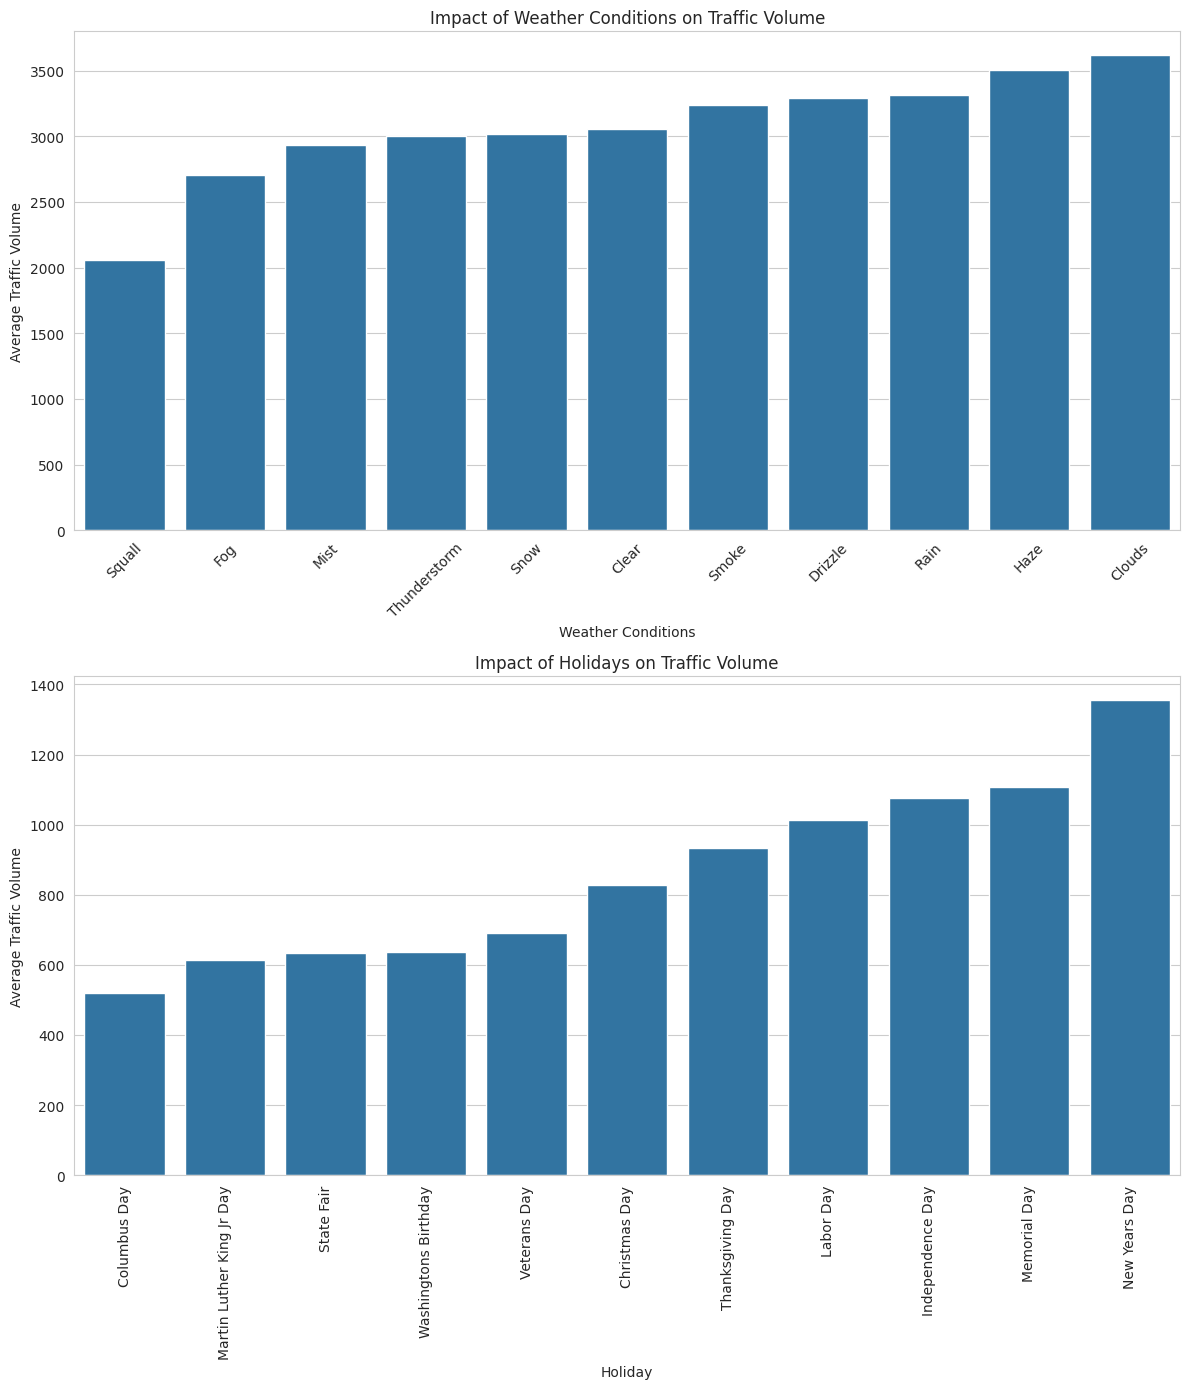

In [ ]:
# Grouping data by weather main and holiday with explicit numeric-only aggregation
weather_traffic = traffic_data_cleaned.groupby('weather_main').mean(numeric_only=True)['traffic_volume'].sort_values()
holiday_traffic = traffic_data_cleaned.groupby('holiday').mean(numeric_only=True)['traffic_volume'].sort_values()

# Visualize the impact of different weather conditions and holidays on traffic volume
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

# Weather Impact on Traffic Volume
sns.barplot(ax=axes[0], x=weather_traffic.index, y=weather_traffic.values)
axes[0].set_title('Impact of Weather Conditions on Traffic Volume')
axes[0].set_ylabel('Average Traffic Volume')
axes[0].set_xlabel('Weather Conditions')
axes[0].tick_params(axis='x', rotation=45)

# Holiday Impact on Traffic Volume
sns.barplot(ax=axes[1], x=holiday_traffic.index, y=holiday_traffic.values)
axes[1].set_title('Impact of Holidays on Traffic Volume')
axes[1].set_ylabel('Average Traffic Volume')
axes[1].set_xlabel('Holiday')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
# Extracting temporal features: hour, day of week, month
traffic_data_cleaned['hour'] = traffic_data_cleaned['date_time'].dt.hour
traffic_data_cleaned['day_of_week'] = traffic_data_cleaned['date_time'].dt.dayofweek
traffic_data_cleaned['month'] = traffic_data_cleaned['date_time'].dt.month

# One-hot encoding for weather conditions
weather_encoded = pd.get_dummies(traffic_data_cleaned['weather_main'], prefix='weather')

# Joining the encoded weather data back to the main DataFrame
traffic_data_fe = traffic_data_cleaned.join(weather_encoded)

# Preview the enhanced DataFrame
traffic_data_fe[['hour', 'day_of_week', 'month'] + list(weather_encoded.columns)].head()

<ipython-input-10-480daab3292b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data_cleaned['hour'] = traffic_data_cleaned['date_time'].dt.hour
<ipython-input-10-480daab3292b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data_cleaned['day_of_week'] = traffic_data_cleaned['date_time'].dt.dayofweek
<ipython-input-10-480daab3292b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,hour,day_of_week,month,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
0,9,1,10,False,True,False,False,False,False,False,False,False,False,False
1,10,1,10,False,True,False,False,False,False,False,False,False,False,False
2,11,1,10,False,True,False,False,False,False,False,False,False,False,False
3,12,1,10,False,True,False,False,False,False,False,False,False,False,False
4,13,1,10,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Convert 'holiday' to a binary feature where 1 represents a holiday and 0 represents a non-holiday
traffic_data_fe['is_holiday'] = (traffic_data_fe['holiday'] != 'None').astype(int)

# Normalize continuous features (temperature - assuming it's in Kelvin and should be converted to a more usable scale)
traffic_data_fe['temp_celsius'] = traffic_data_fe['temp'] - 273.15  # Convert Kelvin to Celsius
scaler_temp = MinMaxScaler(feature_range=(0, 1))
traffic_data_fe['temp_scaled'] = scaler_temp.fit_transform(traffic_data_fe['temp_celsius'].values.reshape(-1, 1))

# Preview of the updated DataFrame with holiday and temperature normalization
traffic_data_fe[['is_holiday', 'temp_celsius', 'temp_scaled']].head()

,is_holiday,temp_celsius,temp_scaled
0,1,15.13,0.929726
1,1,16.21,0.933209
2,1,16.43,0.933918
3,1,16.98,0.935692
4,1,17.99,0.938949


# Data preparation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))

# Preparing the full feature set for modeling
feature_columns = ['hour', 'day_of_week', 'month', 'is_holiday', 'temp_scaled'] + list(weather_encoded.columns)
features = traffic_data_fe[feature_columns]

# Scale all features to [0, 1] (some are already scaled)
scaler_features = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler_features.fit_transform(features)

# Create sequences for LSTM and GRU models
def create_sequences(features, target, n_steps):
    X, y = [], []
    for i in range(len(features) - n_steps):
        end_ix = i + n_steps
        if end_ix > len(features):
            break
        seq_x, seq_y = features[i:end_ix], target[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Target variable (traffic volume)
target_scaled = traffic_data_fe['traffic_volume'].values
target_scaled = scaler.fit_transform(target_scaled.reshape(-1, 1)).flatten()

# Number of timesteps
n_steps = 24  # Using 24 hours of data to predict the next hour

# Generate sequences
X, y = create_sequences(features_scaled, target_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((38530, 24, 16), (9633, 24, 16))

In [ ]:
traffic_data_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48187 entries, 0 to 48203
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   holiday               61 non-null     object        
 1   temp                  48187 non-null  float64       
 2   rain_1h               48187 non-null  float64       
 3   snow_1h               48187 non-null  float64       
 4   clouds_all            48187 non-null  int64         
 5   weather_main          48187 non-null  object        
 6   weather_description   48187 non-null  object        
 7   date_time             48187 non-null  datetime64[ns]
 8   traffic_volume        48187 non-null  int64         
 9   hour                  48187 non-null  int32         
 10  day_of_week           48187 non-null  int32         
 11  month                 48187 non-null  int32         
 12  weather_Clear         48187 non-null  bool          
 13  weather_Clouds       

# Baseline model - LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model architecture
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),  # 50 LSTM units
    Dense(1)  # Output layer to predict scaled traffic volume
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary to understand the architecture
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                13400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 13451 (52.54 KB)
Trainable params: 13451 (52.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Train the model
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=30,  # Number of epochs
    batch_size=64,  # Batch size for training
    validation_split=0.1,  # Use 10% of the data for validation
    verbose=1
)


Epoch 1/30
542/542 [==============================] - 10s 13ms/step - loss: 0.0357 - val_loss: 0.0224
Epoch 2/30
542/542 [==============================] - 8s 15ms/step - loss: 0.0219 - val_loss: 0.0211
Epoch 3/30
542/542 [==============================] - 8s 14ms/step - loss: 0.0179 - val_loss: 0.0152
Epoch 4/30
542/542 [==============================] - 9s 16ms/step - loss: 0.0155 - val_loss: 0.0141
Epoch 5/30
542/542 [==============================] - 7s 12ms/step - loss: 0.0143 - val_loss: 0.0129
Epoch 6/30
542/542 [==============================] - 8s 15ms/step - loss: 0.0134 - val_loss: 0.0120
Epoch 7/30
542/542 [==============================] - 7s 14ms/step - loss: 0.0126 - val_loss: 0.0113
Epoch 8/30
542/542 [==============================] - 8s 14ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 9/30
542/542 [==============================] - 8s 14ms/step - loss: 0.0111 - val_loss: 0.0098
Epoch 10/30
542/542 [==============================] - 7s 13ms/step - loss: 0.0107 - val_l

In [ ]:
# Evaluate the model on the test set
test_loss = lstm_model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', test_loss)


302/302 [==============================] - 1s 4ms/step - loss: 0.0079
Test Loss: 0.007906247861683369


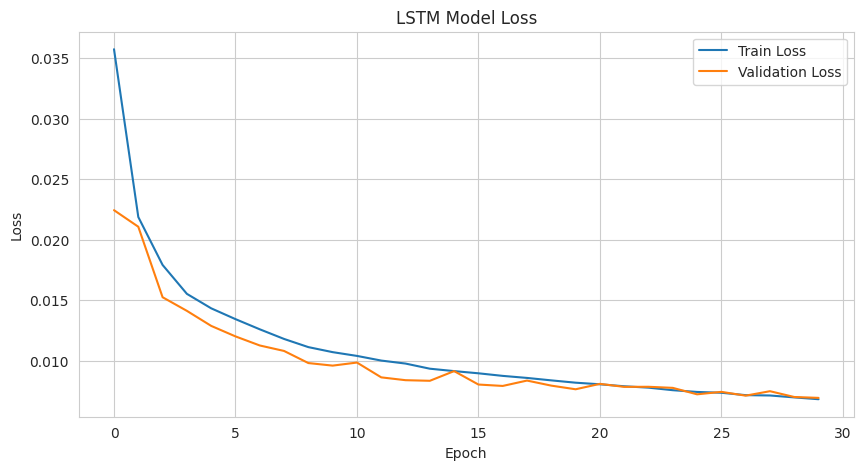

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(10, 5))
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


302/302 [==============================] - 2s 4ms/step
Mean error: -0.004698585449911562
Median error: -0.003925310124407777
Standard deviation of errors: 0.3808348874173076


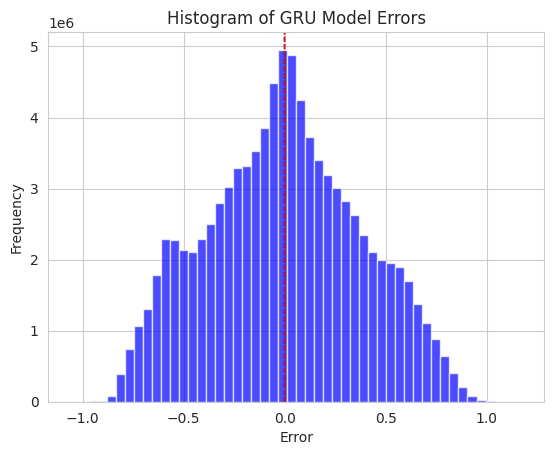

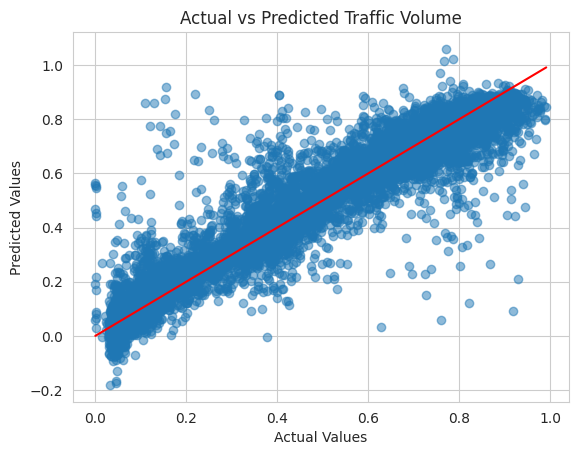

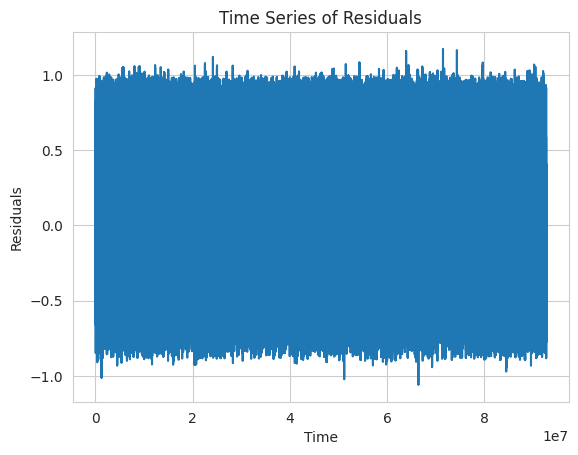

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume y_pred_lstm are the predictions from the GRU model and y_test is the actual values
y_pred_lstm = lstm_model.predict(X_test)

# Calculate residuals
residuals_lstm = y_test - y_pred_lstm

# Statistical summary
residuals_mean = np.mean(residuals_lstm)
residuals_median = np.median(residuals_lstm)
residuals_std = np.std(residuals_lstm)

print(f"Mean error: {residuals_mean}")
print(f"Median error: {residuals_median}")
print(f"Standard deviation of errors: {residuals_std}")

# Flatten the residuals array if it's not already 1D
residuals_lstm = residuals_lstm.flatten()

# Now try plotting the histogram again
plt.hist(residuals_lstm, bins=50, alpha=0.7, color='blue')
plt.axvline(residuals_mean, color='black', linestyle='dashed', linewidth=1)
plt.axvline(residuals_median, color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of LSTM Model Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_lstm, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # A reference line for perfect predictions
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Time series of residuals to check for patterns over time
plt.plot(residuals_lstm)
plt.title("Time Series of Residuals")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()


# **Refined LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Hyperparameter setup
n_units = [50, 100]  # Example options for number of units in LSTM layers
dropout_rate = [0.2, 0.3]  # Example options for dropout rates

# Choose a combination of hyperparameters
n_unit = n_units[0]  # Start with 50 units
d_rate = dropout_rate[0]  # Start with a dropout rate of 0.2

# Define the refined LSTM model
lstm_model_refined = Sequential([
    LSTM(n_unit, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(d_rate),
    LSTM(n_unit),  # Adding a second LSTM layer
    Dropout(d_rate),
    Dense(1)
])

# Compile the refined LSTM model
lstm_model_refined.compile(optimizer='adam', loss='mean_squared_error')

# Train the refined model
lstm_history_refined = lstm_model_refined.fit(
    X_train, y_train,
    epochs=50,  # Increase epochs for deeper training
    batch_size=32,  # Adjusted batch size for the model complexity
    validation_split=0.1,  # Use part of the training set for validation
    verbose=1
)

# Evaluate the refined LSTM model
test_loss_refined = lstm_model_refined.evaluate(X_test, y_test, verbose=1)
print(f'Refined Test Loss: {test_loss_refined}')

Epoch 1/50
1084/1084 [==============================] - 30s 24ms/step - loss: 0.0336 - val_loss: 0.0208
Epoch 2/50
1084/1084 [==============================] - 27s 25ms/step - loss: 0.0219 - val_loss: 0.0165
Epoch 3/50
1084/1084 [==============================] - 32s 30ms/step - loss: 0.0179 - val_loss: 0.0137
Epoch 4/50
1084/1084 [==============================] - 25s 23ms/step - loss: 0.0155 - val_loss: 0.0129
Epoch 5/50
1084/1084 [==============================] - 25s 23ms/step - loss: 0.0140 - val_loss: 0.0112
Epoch 6/50
1084/1084 [==============================] - 26s 24ms/step - loss: 0.0128 - val_loss: 0.0097
Epoch 7/50
1084/1084 [==============================] - 26s 24ms/step - loss: 0.0120 - val_loss: 0.0094
Epoch 8/50
1084/1084 [==============================] - 26s 24ms/step - loss: 0.0113 - val_loss: 0.0083
Epoch 9/50
1084/1084 [==============================] - 26s 24ms/step - loss: 0.0107 - val_loss: 0.0080
Epoch 10/50
1084/1084 [==============================] - 25s 23m

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions
y_pred = lstm_model_refined.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


302/302 [==============================] - 3s 7ms/step
Mean Absolute Error: 341.5162132965693
Root Mean Squared Error: 560.4651524872894


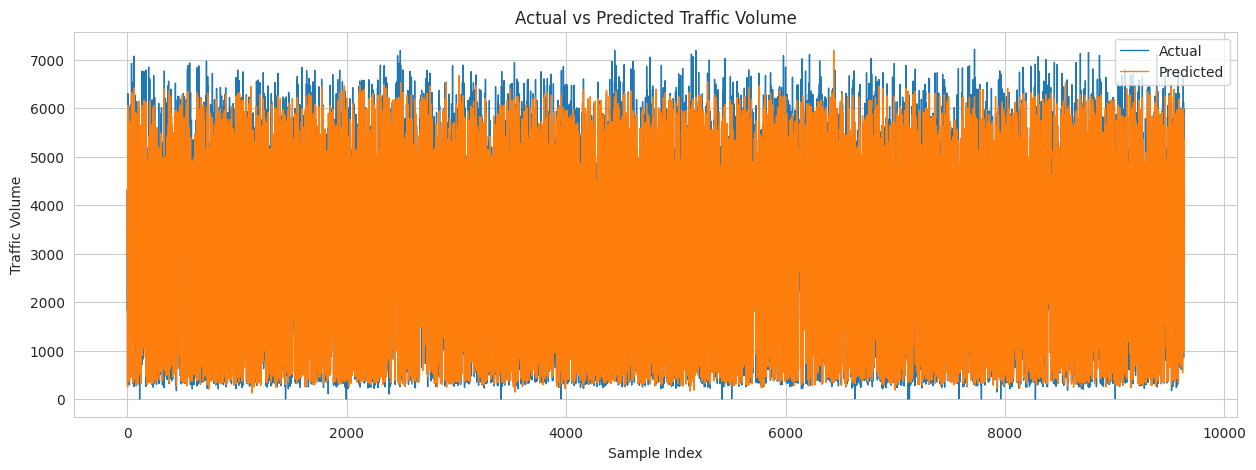

In [ ]:
import matplotlib.pyplot as plt

# Generate a plot of the actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled, label='Actual', linewidth=1)
plt.plot(y_pred_rescaled, label='Predicted', linewidth=1)
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


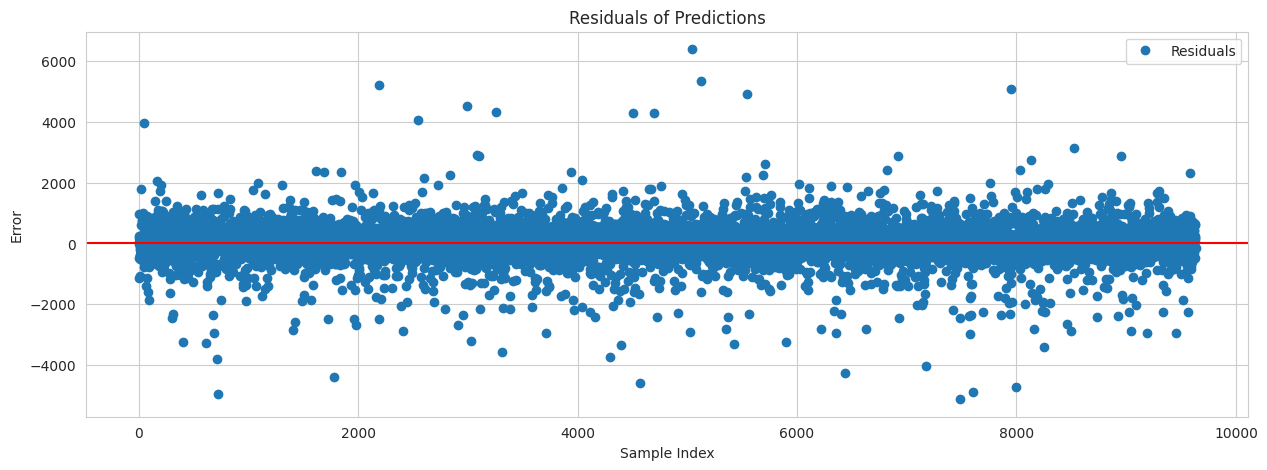

In [ ]:
# Calculate residuals
residuals = y_test_rescaled.flatten() - y_pred_rescaled.flatten()

# Plotting the residuals
plt.figure(figsize=(15, 5))
plt.plot(residuals, label='Residuals', marker='o', linestyle='')
plt.title('Residuals of Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()


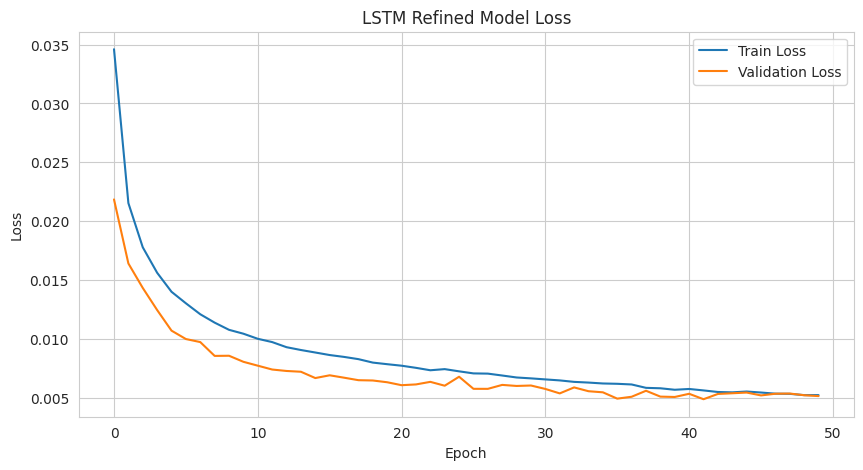

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(10, 5))
plt.plot(lstm_history_refined.history['loss'], label='Train Loss')
plt.plot(lstm_history_refined.history['val_loss'], label='Validation Loss')
plt.title('LSTM Refined Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Stacked LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define a stacked LSTM model
stacked_lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),  # return_sequences set to False on last LSTM layer
    Dense(1)
])

stacked_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the stacked LSTM model
history_stacked_lstm = stacked_lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model
test_loss_stacked_lstm = stacked_lstm_model.evaluate(X_test, y_test, verbose=1)
print(f'Stacked LSTM Test Loss: {test_loss_stacked_lstm}')


Epoch 1/50
1084/1084 [==============================] - 33s 26ms/step - loss: 0.0291 - val_loss: 0.0178
Epoch 2/50
1084/1084 [==============================] - 27s 25ms/step - loss: 0.0165 - val_loss: 0.0138
Epoch 3/50
1084/1084 [==============================] - 28s 26ms/step - loss: 0.0133 - val_loss: 0.0107
Epoch 4/50
1084/1084 [==============================] - 28s 26ms/step - loss: 0.0115 - val_loss: 0.0093
Epoch 5/50
1084/1084 [==============================] - 28s 25ms/step - loss: 0.0105 - val_loss: 0.0087
Epoch 6/50
1084/1084 [==============================] - 27s 25ms/step - loss: 0.0098 - val_loss: 0.0080
Epoch 7/50
1084/1084 [==============================] - 28s 25ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 8/50
1084/1084 [==============================] - 27s 25ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 9/50
1084/1084 [==============================] - 27s 25ms/step - loss: 0.0083 - val_loss: 0.0079
Epoch 10/50
1084/1084 [==============================] - 27s 25m

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions
y_pred = stacked_lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
import matplotlib.pyplot as plt

# Generate a plot of the actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled, label='Actual', linewidth=1)
plt.plot(y_pred_rescaled, label='Predicted', linewidth=1)
plt.title('Stacked LSTM Actual vs Predicted Traffic Volume')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(10, 5))
plt.plot(history_stacked_lstm.history['loss'], label='Train Loss')
plt.plot(history_stacked_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Refined Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# **Sarima Model**

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 21.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [ ]:
traffic_data.set_index('date_time', inplace=True)

# Resample the traffic volume data hourly if not already
traffic_volume_hourly = traffic_data['traffic_volume'].resample('H').mean().fillna(method='ffill')

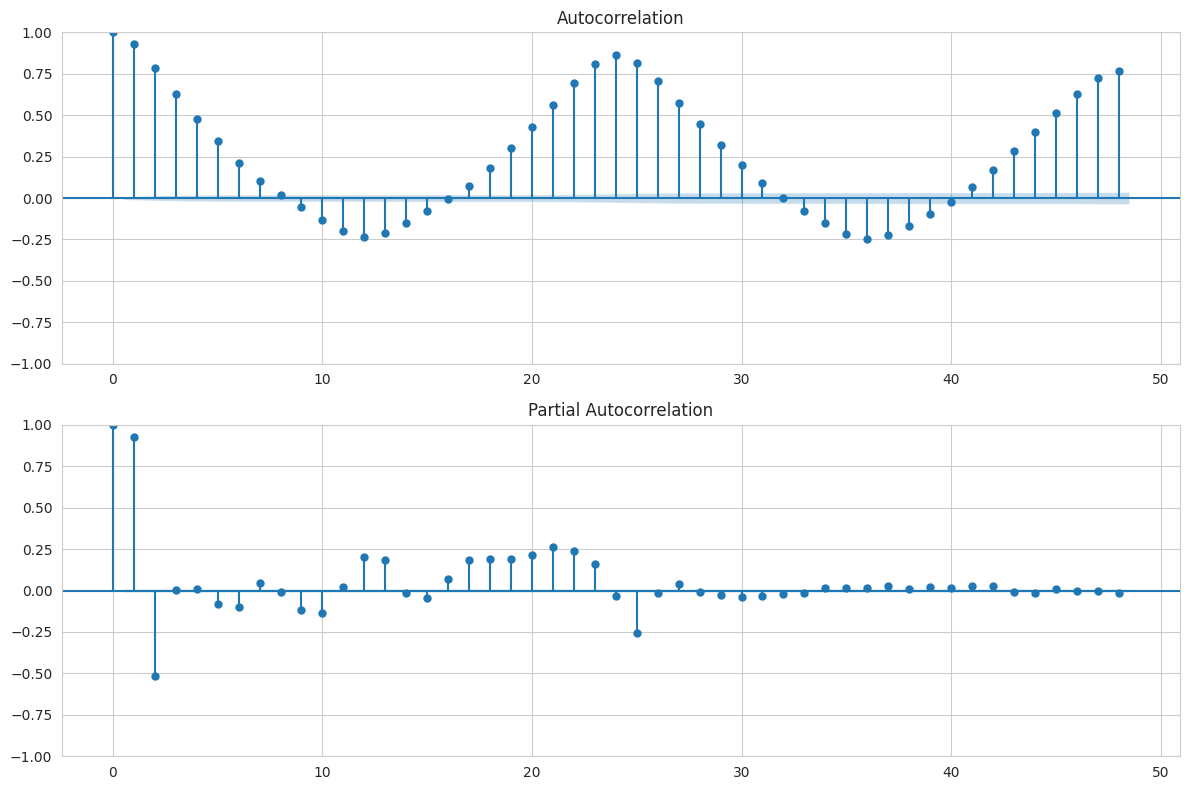

In [ ]:
# Plotting the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(traffic_volume_hourly, lags=48, ax=ax1)  # You might adjust the lags to see more/less periods
plot_pacf(traffic_volume_hourly, lags=48, ax=ax2) # Same here

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# SARIMA Model Configuration
sarima_model = SARIMAX(traffic_volume_hourly,
                       order=(1, 1, 0),  # Non-seasonal order
                       seasonal_order=(1, 1, 1, 24),  # Seasonal order
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fitting the model
sarima_result = sarima_model.fit()

# Summary of the model fit
print(sarima_result.summary())

# Predictions and Evaluations
pred_start_date = traffic_volume_hourly.index[-168]  # last 7 days
pred_end_date = traffic_volume_hourly.index[-1]
predictions = sarima_result.predict(start=pred_start_date, end=pred_end_date)
actuals = traffic_volume_hourly[pred_start_date:pred_end_date]

mae = mean_absolute_error(actuals, predictions)
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)

# Output the evaluation metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


                                      SARIMAX Results                                       
Dep. Variable:                       traffic_volume   No. Observations:                52551
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 24)   Log Likelihood             -402576.226
Date:                              Tue, 30 Apr 2024   AIC                         805160.451
Time:                                      02:08:46   BIC                         805195.925
Sample:                                  10-02-2012   HQIC                        805171.538
                                       - 09-30-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1161      0.003     44.422      0.000       0.111       0.121
ar.S.L24       0.20

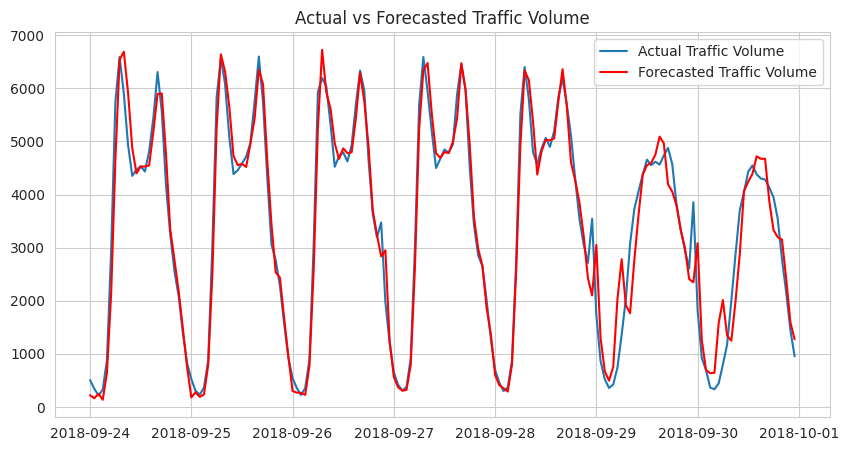

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual Traffic Volume')
plt.plot(predictions, color='red', label='Forecasted Traffic Volume')
plt.title('Actual vs Forecasted Traffic Volume')
plt.legend()
plt.show()

# Simple Ensemble

In [ ]:
# Length of the LSTM test data
lstm_test_length = len(X_test)  # This should be the same length used for generating LSTM predictions

# Adjusting SARIMA predictions to match the same length
# Assuming the overall dataset from which X_test is derived is `traffic_data`
total_length = len(traffic_data)
sarima_start = total_length - lstm_test_length  # This adjusts the start index for SARIMA predictions

# Generate SARIMA predictions with corrected indices
sarima_predictions = sarima_result.get_prediction(start=sarima_start, end=total_length-1)
sarima_predicted_mean = sarima_predictions.predicted_mean

# Check if lengths match now
print("Length of SARIMA Predictions:", len(sarima_predicted_mean))
print("Length of LSTM Predictions:", len(lstm_predicted_test_rescaled))

Length of SARIMA Predictions: 9633
Length of LSTM Predictions: 9633


In [ ]:
# Generate LSTM predictions for the test set
lstm_predicted_test = stacked_lstm_model.predict(X_test)
lstm_predicted_test_rescaled = scaler.inverse_transform(lstm_predicted_test)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

302/302 [==============================] - 2s 7ms/step


In [ ]:
# Assuming now both prediction arrays are of the same length
ensemble_predictions = (sarima_predicted_mean + lstm_predicted_test_rescaled.flatten()) / 2

# Evaluate the ensemble predictions
ensemble_mae = mean_absolute_error(y_test_rescaled.flatten(), ensemble_predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test_rescaled.flatten(), ensemble_predictions))

# Output the ensemble evaluation metrics
print(f'Ensemble MAE: {ensemble_mae}')
print(f'Ensemble RMSE: {ensemble_rmse}')


Ensemble MAE: 1198.1448940111304
Ensemble RMSE: 1474.714773892066


# Hybrid model= Sarima + Stacked LSTM



In [ ]:
# Generate SARIMA predictions and calculate residuals
predictions = sarima_result.get_prediction(start='2018-09-01', end='2018-09-30')
predicted_values = predictions.predicted_mean
actuals = traffic_volume_hourly['2018-09-01':'2018-09-30']
residuals = actuals - predicted_values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the residuals
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Function to create LSTM input sequences, as in your initial approach
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        end_ix = i + n_steps
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 24  # Number of timesteps per sequence
X, y = create_sequences(residuals_scaled, n_steps)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the stacked LSTM model
stacked_lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(n_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])
stacked_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model on the residuals
stacked_lstm_model.fit(X, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
22/22 [==============================] - 4s 19ms/step - loss: 0.0866
Epoch 2/50
22/22 [==============================] - 0s 18ms/step - loss: 0.0241
Epoch 3/50
22/22 [==============================] - 0s 18ms/step - loss: 0.0210
Epoch 4/50
22/22 [==============================] - 0s 18ms/step - loss: 0.0210
Epoch 5/50
22/22 [==============================] - 0s 18ms/step - loss: 0.0210
Epoch 6/50
22/22 [==============================] - 0s 18ms/step - loss: 0.0211
Epoch 7/50
22/22 [==============================] - 0s 18ms/step - loss: 0.0208
Epoch 8/50
22/22 [==============================] - 0s 18ms/step - loss: 0.0207
Epoch 9/50
22/22 [==============================] - 0s 19ms/step - loss: 0.0207
Epoch 10/50
22/22 [==============================] - 0s 19ms/step - loss: 0.0213
Epoch 11/50
22/22 [==============================] - 0s 16ms/step - loss: 0.0205
Epoch 12/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0203
Epoch 13/50
22/22 [==================

In [ ]:
# Predict residuals using the stacked LSTM model
residual_predictions = stacked_lstm_model.predict(X)
residual_predictions = scaler.inverse_transform(residual_predictions)  # inverse scaling

# Final adjusted forecasts
adjusted_forecasts = predicted_values.values[-len(residual_predictions):] + residual_predictions.flatten()


22/22 [==============================] - 1s 7ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluation against the final part of actual data
final_actuals = actuals.values[-len(adjusted_forecasts):]
mae = mean_absolute_error(final_actuals, adjusted_forecasts)
rmse = mean_squared_error(final_actuals, adjusted_forecasts, squared=False)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 273.2661492608415
Root Mean Squared Error: 398.4888566157099


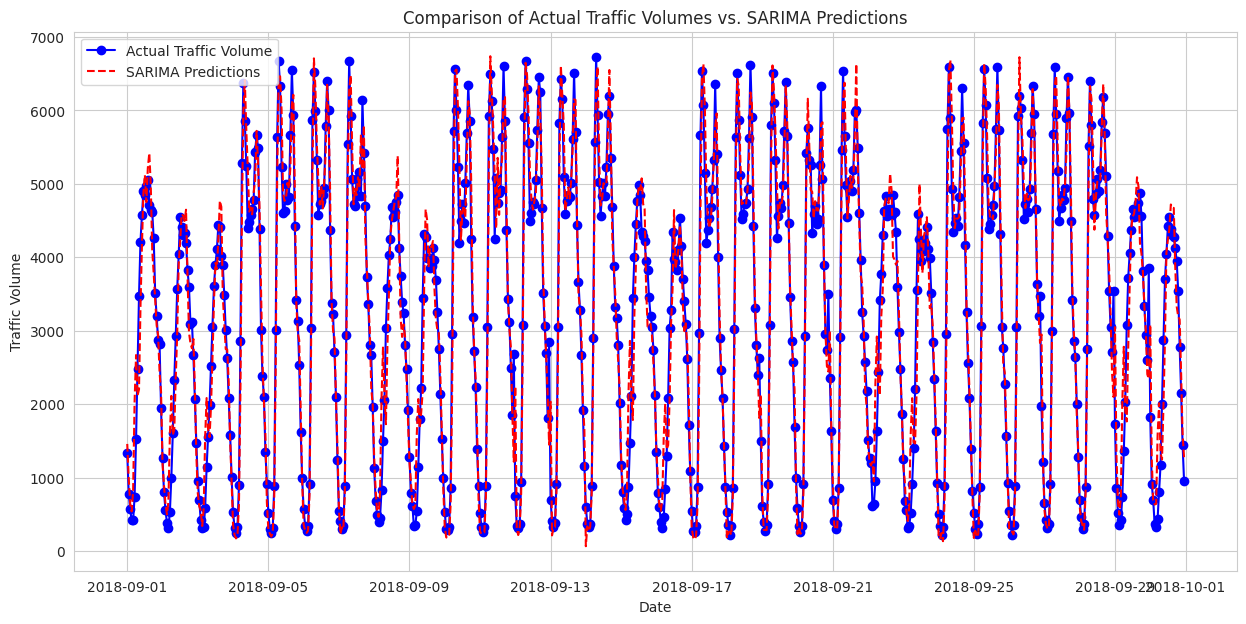

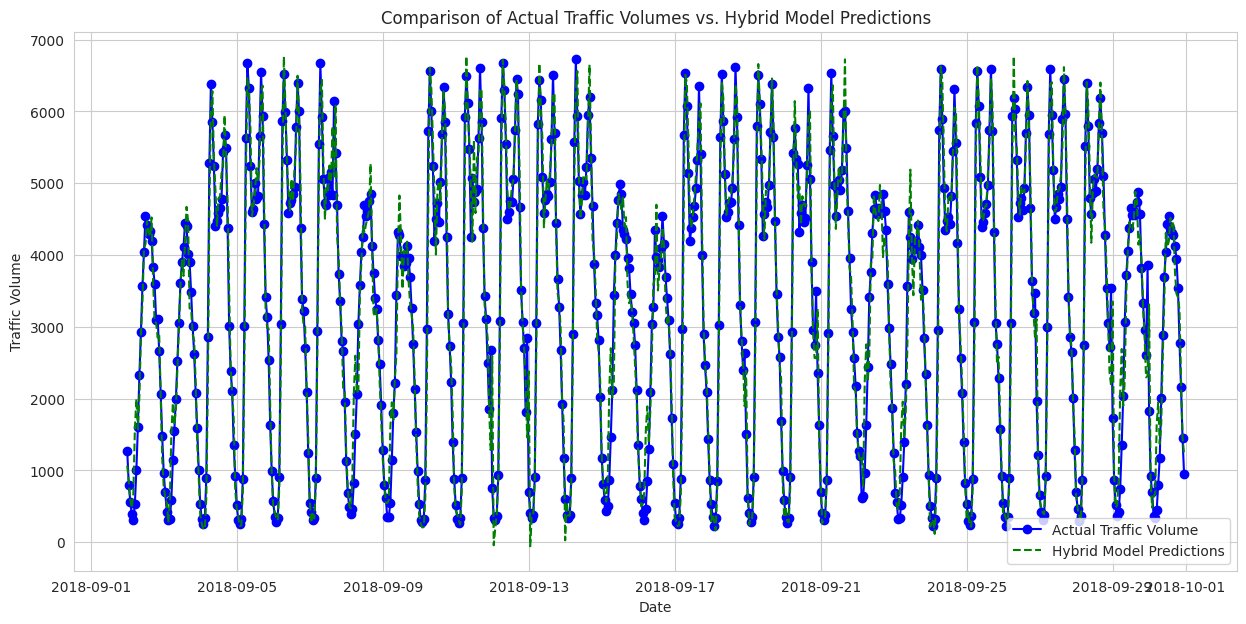

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'actuals' is the actual traffic volume from your dataset and 'predicted_values' from SARIMA
# 'adjusted_forecasts' is the output from the hybrid model

# Convert indices for plotting if they are not in date format already
adjusted_dates = dates[-len(adjusted_forecasts):]

# Plot SARIMA Predictions vs Actuals
plt.figure(figsize=(15, 7))
plt.plot(dates, actuals, label='Actual Traffic Volume', color='blue', marker='o')
plt.plot(dates, predicted_values, label='SARIMA Predictions', color='red', linestyle='--')
plt.title('Comparison of Actual Traffic Volumes vs. SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Plot Hybrid Model Predictions vs Actuals
plt.figure(figsize=(15, 7))
plt.plot(adjusted_dates, actuals[-len(adjusted_forecasts):], label='Actual Traffic Volume', color='blue', marker='o')
plt.plot(adjusted_dates, adjusted_forecasts, label='Hybrid Model Predictions', color='green', linestyle='--')
plt.title('Comparison of Actual Traffic Volumes vs. Hybrid Model Predictions')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# GRU-models


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the GRU model
gru_model = Sequential([
    GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model
test_loss_gru = gru_model.evaluate(X_test, y_test, verbose=1)
print(f'GRU Test Loss: {test_loss_gru}')


Epoch 1/50
1084/1084 [==============================] - 17s 14ms/step - loss: 0.0312 - val_loss: 0.0214
Epoch 2/50
1084/1084 [==============================] - 14s 13ms/step - loss: 0.0188 - val_loss: 0.0151
Epoch 3/50
1084/1084 [==============================] - 14s 13ms/step - loss: 0.0154 - val_loss: 0.0125
Epoch 4/50
1084/1084 [==============================] - 14s 13ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 5/50
1084/1084 [==============================] - 14s 13ms/step - loss: 0.0120 - val_loss: 0.0103
Epoch 6/50
1084/1084 [==============================] - 14s 13ms/step - loss: 0.0112 - val_loss: 0.0095
Epoch 7/50
1084/1084 [==============================] - 14s 13ms/step - loss: 0.0107 - val_loss: 0.0094
Epoch 8/50
1084/1084 [==============================] - 14s 13ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 9/50
1084/1084 [==============================] - 15s 13ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 10/50
1084/1084 [==============================] - 14s 13m

302/302 [==============================] - 1s 4ms/step
Mean error: 0.004996460557037884
Median error: 0.004044453152915933
Standard deviation of errors: 0.3832631153749983


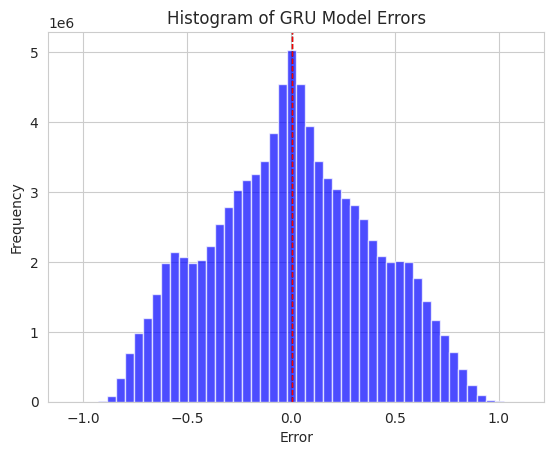

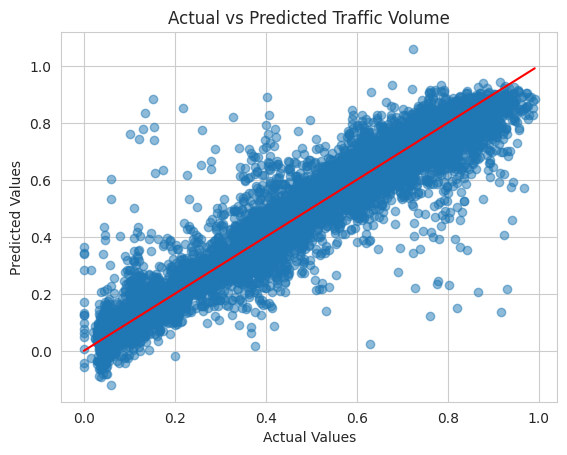

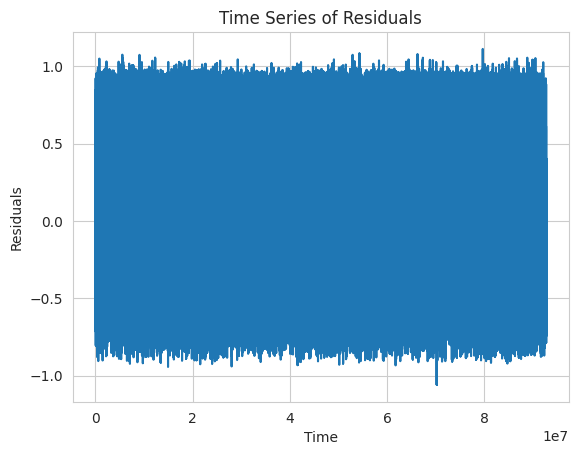

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume y_pred_gru are the predictions from the GRU model and y_test is the actual values
y_pred_gru = gru_model.predict(X_test)

# Calculate residuals
residuals_gru = y_test - y_pred_gru

# Statistical summary
residuals_mean = np.mean(residuals_gru)
residuals_median = np.median(residuals_gru)
residuals_std = np.std(residuals_gru)

print(f"Mean error: {residuals_mean}")
print(f"Median error: {residuals_median}")
print(f"Standard deviation of errors: {residuals_std}")

# Flatten the residuals array if it's not already 1D
residuals_gru = residuals_gru.flatten()

# Now try plotting the histogram again
plt.hist(residuals_gru, bins=50, alpha=0.7, color='blue')
plt.axvline(residuals_mean, color='black', linestyle='dashed', linewidth=1)
plt.axvline(residuals_median, color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of GRU Model Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_gru, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # A reference line for perfect predictions
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Time series of residuals to check for patterns over time
plt.plot(residuals_gru)
plt.title("Time Series of Residuals")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()


# Refined GRU with dropout

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Define the GRU model with dropout
refined_gru_model = Sequential([
    GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), recurrent_dropout=0.2),
    Dropout(0.2),
    Dense(1)
])

# Compile the refined GRU model
refined_gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_refined_gru = refined_gru_model.fit(
    X_train, y_train,
    epochs=50,  # Number of epochs can be adjusted based on earlier stopping points
    batch_size=32,  # Batch size can be tuned
    validation_split=0.1,  # Use a part of the training data for validation
    verbose=1
)

# Evaluate the model
test_loss_refined_gru = refined_gru_model.evaluate(X_test, y_test, verbose=1)
print(f'Refined GRU Test Loss: {test_loss_refined_gru}')

Epoch 1/50
1084/1084 [==============================] - 54s 47ms/step - loss: 0.0373 - val_loss: 0.0223
Epoch 2/50
1084/1084 [==============================] - 27s 25ms/step - loss: 0.0249 - val_loss: 0.0180
Epoch 3/50
1084/1084 [==============================] - 27s 25ms/step - loss: 0.0207 - val_loss: 0.0154
Epoch 4/50
1084/1084 [==============================] - 28s 26ms/step - loss: 0.0183 - val_loss: 0.0148
Epoch 5/50
1084/1084 [==============================] - 30s 27ms/step - loss: 0.0167 - val_loss: 0.0121
Epoch 6/50
1084/1084 [==============================] - 27s 24ms/step - loss: 0.0154 - val_loss: 0.0108
Epoch 7/50
1084/1084 [==============================] - 26s 24ms/step - loss: 0.0145 - val_loss: 0.0104
Epoch 8/50
1084/1084 [==============================] - 28s 25ms/step - loss: 0.0138 - val_loss: 0.0100
Epoch 9/50
1084/1084 [==============================] - 28s 26ms/step - loss: 0.0134 - val_loss: 0.0095
Epoch 10/50
1084/1084 [==============================] - 30s 28m

302/302 [==============================] - 4s 13ms/step
Refined GRU RMSE: 0.3710326710595299
Mean error: 0.0008382747974734099
Median error: -0.001633219666533417
Standard deviation of errors: 0.37103172410042395


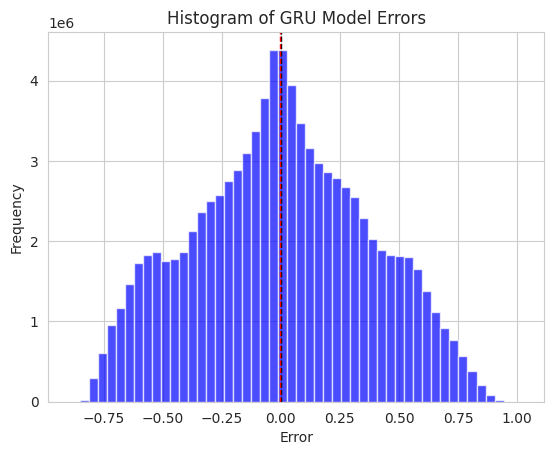

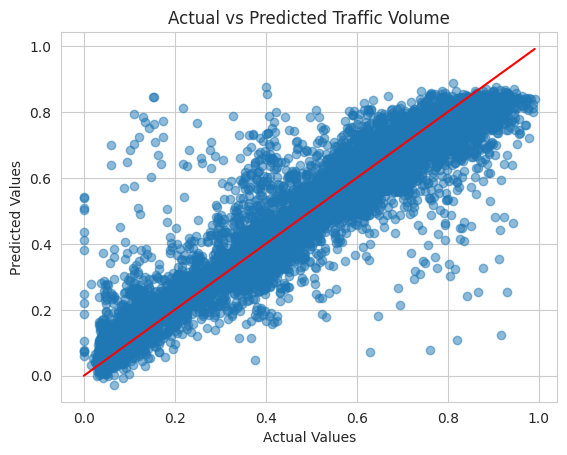

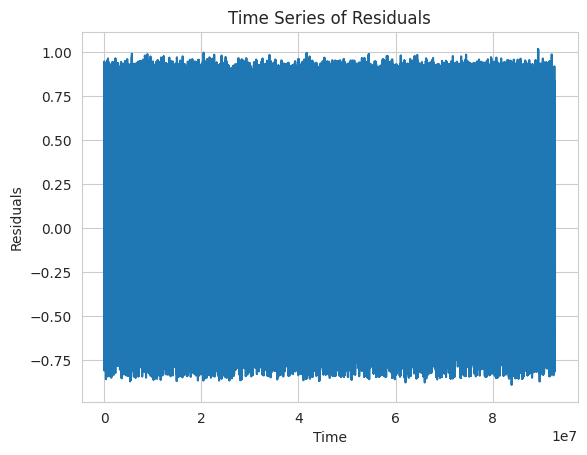

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Assume y_pred_gru are the predictions from the GRU model and y_test is the actual values
y_pred_gru_refined = refined_gru_model.predict(X_test)

# Calculate residuals
residuals_gru_refined = y_test - y_pred_gru_refined

# Statistical summary
residuals_mean = np.mean(residuals_gru_refined)
residuals_median = np.median(residuals_gru_refined)
residuals_std = np.std(residuals_gru_refined)

# Calculate Mean Squared Error (MSE)
mse_refined = mean_squared_error(y_test, y_pred_gru_refined)


# Calculate RMSE
mse_refined = np.mean(np.square(y_test - y_pred_gru_refined))
rmse_refined_gru = np.sqrt(mse_refined)
print(f'Refined GRU RMSE: {rmse_refined_gru}')

print(f"Mean error: {residuals_mean}")
print(f"Median error: {residuals_median}")
print(f"Standard deviation of errors: {residuals_std}")

# Flatten the residuals array if it's not already 1D
residuals_gru_refined = residuals_gru_refined.flatten()

# Now try plotting the histogram again
plt.hist(residuals_gru_refined, bins=50, alpha=0.7, color='blue')
plt.axvline(residuals_mean, color='black', linestyle='dashed', linewidth=1)
plt.axvline(residuals_median, color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of GRU Model Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_gru_refined, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # A reference line for perfect predictions
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Time series of residuals to check for patterns over time
plt.plot(residuals_gru_refined)
plt.title("Time Series of Residuals")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()
